To run this notebook, click "Runtime" -> "Run All" on the top menu bar.

# Visualizations for NPS Comments

To start, we first import the necessary libraries.


In [1]:
import numpy as np
import pandas as pd

from nltk.stem import PorterStemmer
from nltk.stem.snowball import SnowballStemmer
from nltk.tokenize import word_tokenize

from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style = "whitegrid", 
        color_codes = True,
        font_scale = 1.5)

from google.colab import files

# Directions

This document/tool contains visualizations for NPS comments by score, date, and more.

Running the below cell will prompt you for a file upload. The file should be in the same format as the `nps_comments.csv` file shared with our team.

There is also a table of contents on the left sidebar to help with navigation!

In [17]:
uploaded = files.upload()

Saving nps_comments_jan_apr_2021.csv to nps_comments_jan_apr_2021.csv
Saving nps_comments_may_sept_2021.csv to nps_comments_may_sept_2021.csv


In [52]:
import io
nps = pd.read_csv(io.BytesIO(uploaded['nps_comments_may_sept_2021.csv']))

# General Observations of NPS Comments Data

In [53]:
# first few rows of nps_comments data set 
nps.head()

,Response ID,Score,Comment,Response Timestamp
0,188015338,0,NaN,9/6/21 22:54
1,187990985,10,NaN,9/6/21 17:34
2,187981184,10,Love the products and environmental benefits!,9/6/21 15:51
3,187970424,7,The only downfall to Humankind is that it’s no...,9/6/21 14:17
4,187910976,10,NaN,9/6/21 6:03


### Numerical Statistics for the overall NPS Scores

In [54]:
nps.describe()

,Response ID,Score
count,8.090000e+02,809.000000
mean,1.794870e+08,7.562423
std,5.059893e+06,3.489216
min,1.715763e+08,0.000000
25%,1.747883e+08,6.000000
50%,1.790350e+08,10.000000
75%,1.837356e+08,10.000000
max,1.880153e+08,10.000000


### Counts of NPS Scores (1-10)

In [55]:
nps['Score'].value_counts()

10    423
0      83
9      70
8      68
7      37
3      28
5      24
2      22
6      21
1      17
4      16
Name: Score, dtype: int64

### Distribution of NPS Scores

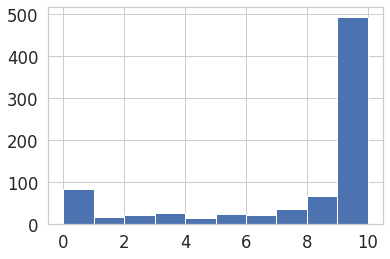

In [56]:
nps['Score'].hist();

# Helper Functions and Data Cleaning

In [57]:
# function to create categories based off of nps scores
def category(data):
  arr = []
  for i in data['Score']:
    if i >= 9:
      arr.append('promoter')
    elif 8 >= i > 6:
      arr.append('neutral')
    else:
      arr.append('detractor')
  return arr

In [58]:
nps_copy = nps.copy()
nps_copy['Category'] = category(nps_copy)

In [59]:
nps_copy

,Response ID,Score,Comment,Response Timestamp,Category
0,188015338,0,NaN,9/6/21 22:54,detractor
1,187990985,10,NaN,9/6/21 17:34,promoter
2,187981184,10,Love the products and environmental benefits!,9/6/21 15:51,promoter
3,187970424,7,The only downfall to Humankind is that it’s no...,9/6/21 14:17,neutral
4,187910976,10,NaN,9/6/21 6:03,promoter
...,...,...,...,...,...
804,171591977,10,I’m very happy with the quality of the product...,5/1/21 10:52,promoter
805,171590320,9,NaN,5/1/21 10:31,promoter
806,171589099,10,NaN,5/1/21 10:14,promoter
807,171579150,10,NaN,5/1/21 7:50,promoter


In [60]:
pd.options.mode.chained_assignment = None 
s_stemmer = SnowballStemmer("english")
stopwords = set(STOPWORDS)

In [61]:
# words cloud based on input score function
def make_wordcloud(score):
    sub_df = nps[nps.Score == score]
    temp = sub_df["Comment"].str.replace("[^\w\s]", "").str.lower().str.split()
    
    comment_tokens = []
    
    for i in temp:
        try:
            token_list = [s_stemmer.stem(word) for word in i]
        except:
            token_list = []
    
        comment_tokens.append(token_list)
    comment_word_string = " ".join(sum(list(comment_tokens), []))
    
    wordcloud = WordCloud(width = 300, height = 300,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_word_string)
  
    
    # plot the WordCloud image                       
    plt.figure(figsize = (8, 8), facecolor = None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)

In [62]:
# words cloud based on category function
def make_wordcloud_other(cat):
    sub_df = nps_copy[nps_copy.Category == cat]
    temp = sub_df["Comment"].str.replace("[^\w\s]", "").str.lower().str.split()
    
    comment_tokens = []
    
    for i in temp:
        try:
            token_list = [s_stemmer.stem(word) for word in i]
        except:
            token_list = []
    
        comment_tokens.append(token_list)
    comment_word_string = " ".join(sum(list(comment_tokens), []))
    
    wordcloud = WordCloud(width = 300, height = 300,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_word_string)
  
    
    # plot the WordCloud image                       
    plt.figure(figsize = (8, 8), facecolor = None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)

# Word Clouds of NPS Comments By Score

To view the word cloud of NPS comments with any other score, just change the number in the below function!

In [15]:
# nps comments that have score of 10, most common words shown through a word cloud
make_wordcloud(10)

ValueError: ignored

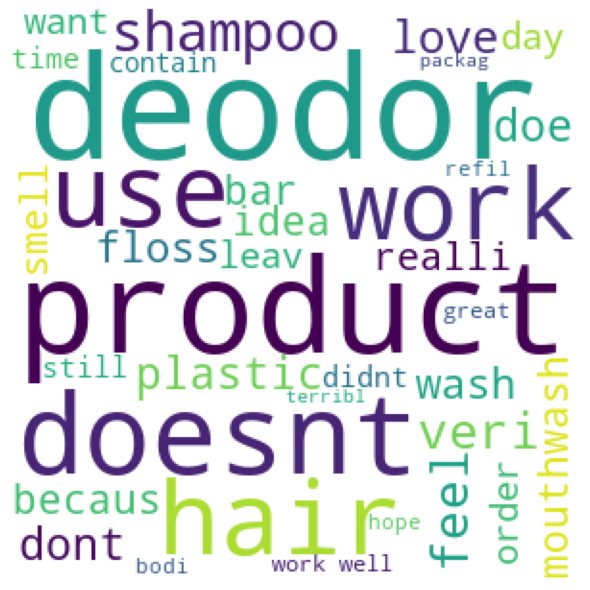

In [ ]:
# nps comments that have score of 1, most common words shown through a word cloud
make_wordcloud(1)

# Word Clouds of NPS Comments by Category (Great, Good, Ok, Bad)

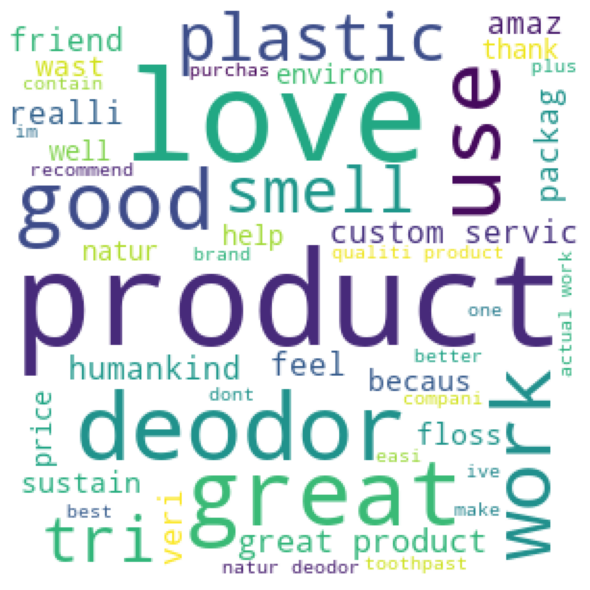

In [63]:
# Score 9 or 10 (package, compani, humankind)
make_wordcloud_other('promoter')

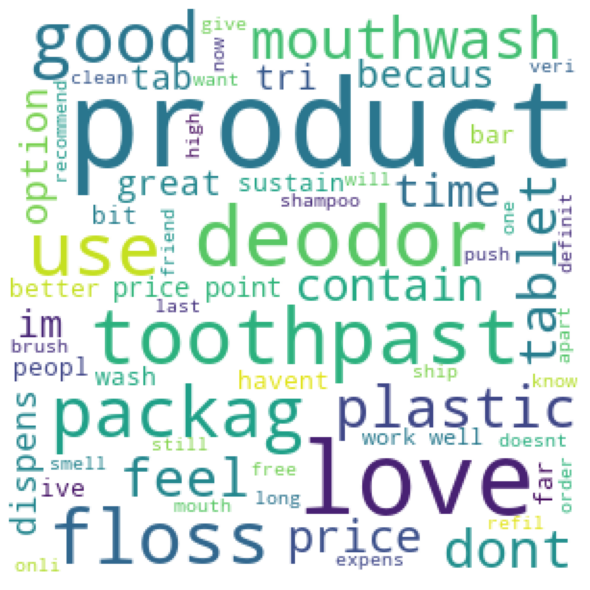

In [31]:
# Score 6,7,8 (packag, price)
make_wordcloud_other('neutral')

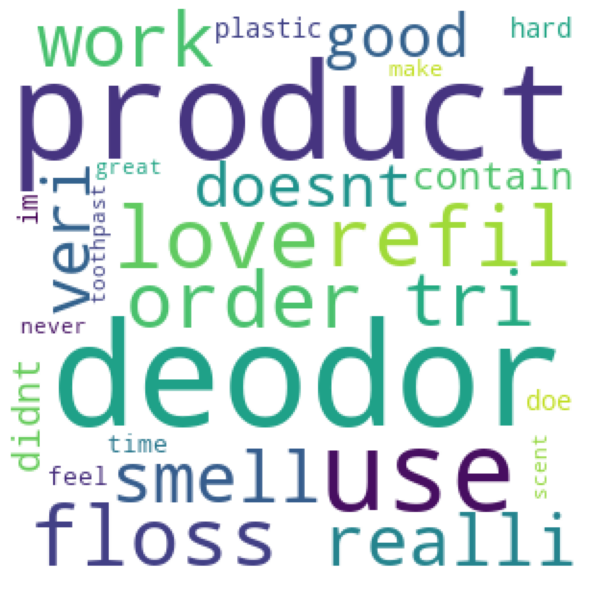

In [64]:
# score equal to 5 (order)
make_wordcloud_other('detractor')

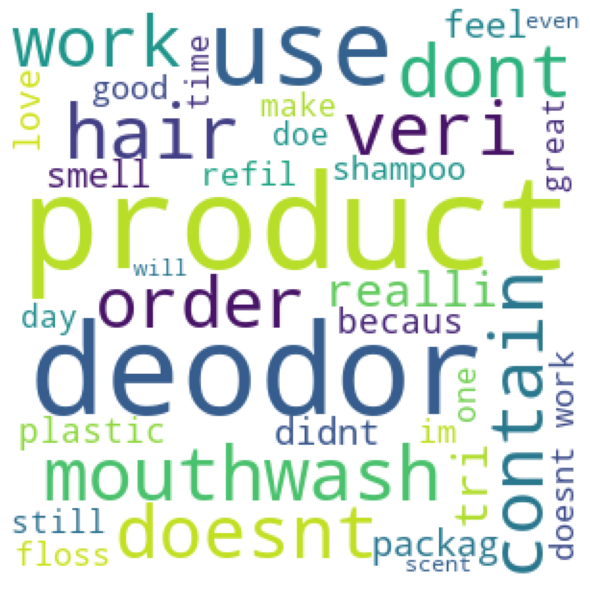

In [ ]:
# score less than 5 (order)
make_wordcloud_other('bad')

In [65]:
nps_copy['Response Timestamp'] = pd.to_datetime(nps_copy['Response Timestamp'])

In [66]:
nps_copy['date'] = nps_copy['Response Timestamp'].dt.date

In [67]:
nps_copy['date'] = nps_copy['date'].apply(lambda x: x.strftime('%Y-%m'))

In [68]:
# lineplots below show the mean score based off of each month. *note the time is reversed on the xaxis where from left to right it represents current to past
# countplots below show the number of "great", "good", "ok", "bad" comment scores based off of date *note the time is reversed on the xaxis where from left to right it represents current to past

# Date-Based Visualizations

Lineplots below show the mean score based off of each month. Note the time is reversed on the xaxis where from left to right it represents current to past.

Countplots below show the number of "great", "good", "ok", "bad" comment scores based off of date. Note the time is reversed on the x-axis where from left to right it represents current to past.

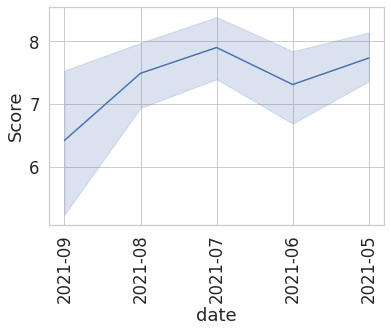

In [69]:
# lineplot of nps comments data set based off of months
sns.lineplot(data = nps_copy, x = 'date', y = 'Score');
plt.xticks(rotation=90);

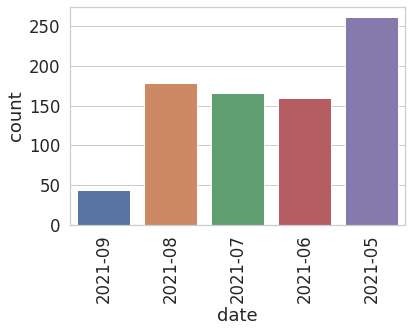

In [70]:
# countplot of nps comments data set based off of months
sns.countplot(data = nps_copy, x = 'date');
plt.xticks(rotation=90);

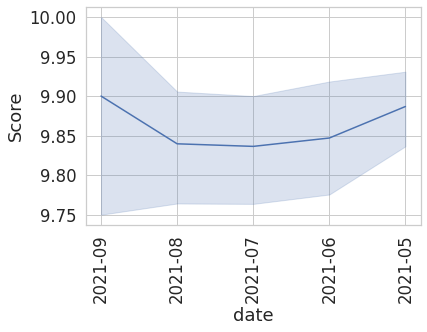

In [71]:
sns.lineplot(data = nps_copy[nps_copy['Category'] == 'promoter'], x = 'date', y = 'Score');
plt.xticks(rotation=90);

# great = score of 8,9,10
# shows mean of ratings based on time period
# 02/19 = low mean for "great"
# 04/20 = low mean for "great"
# 01/21 = high mean for "great"

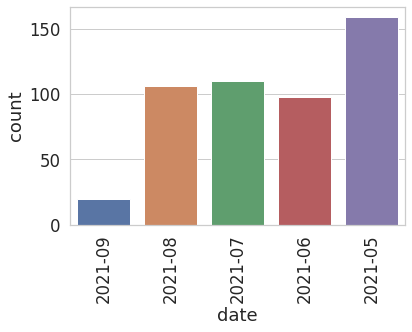

In [72]:
sns.countplot(data = nps_copy[nps_copy['Category'] == 'promoter'], x = 'date');
plt.xticks(rotation=90);

# shows count of "great" ratings during time period
# 04/20 = most "great" comments
# 11/19 = least "great" comments excluding beginning and end

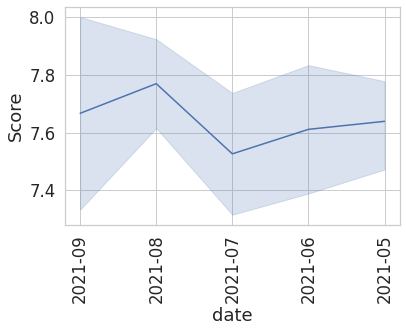

In [73]:
sns.lineplot(data = nps_copy[nps_copy['Category'] == 'neutral'], x = 'date', y = 'Score');
plt.xticks(rotation=90);

# good = score of 6 and 7
# shows mean of ratings based on time period
# 05/19 = highest mean for "good"
# 07/19 = lowest mean for "good"

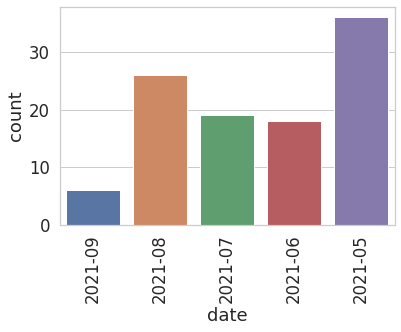

In [74]:
sns.countplot(data = nps_copy[nps_copy['Category'] == 'neutral'], x = 'date');
plt.xticks(rotation=90);

# ok = score of 6-7
# shows count of "good" ratings during time period
# 05/20 = most "good" comments
# 09/19 = least "good" comments

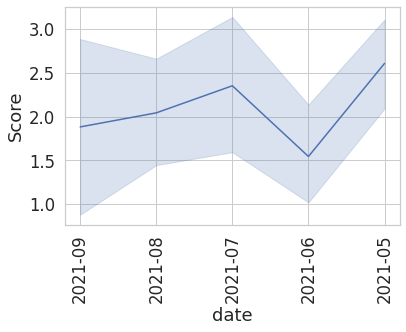

In [75]:
sns.lineplot(data = nps_copy[nps_copy['Category'] == 'detractor'], x = 'date', y = 'Score');
plt.xticks(rotation=90);
# good = score of 5
# shows mean of ratings based on time period

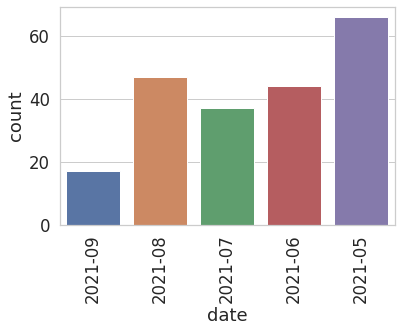

In [76]:
sns.countplot(data = nps_copy[nps_copy['Category'] == 'detractor'], x = 'date');
plt.xticks(rotation=90);
# ok = score of 5
# shows count of "ok" ratings during time period
# 08/20 = most "ok" comments
# 07/19 = least "ok" comments

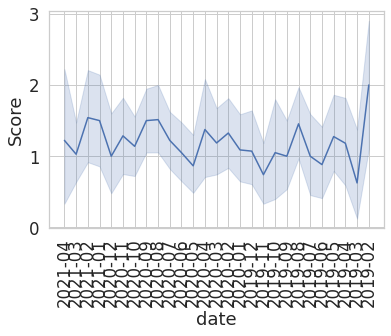

In [ ]:
sns.lineplot(data = nps_copy[nps_copy['Category'] == 'bad'], x = 'date', y = 'Score');
plt.xticks(rotation=90);

# bad = score of 1-4
# shows mean of ratings based on time period
# no major outliers
# 08/19, 08/21, 02/21 = highest mean
# 03/19, 11/19, 04/20 = lowest mean

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26]),
 <a list of 27 Text major ticklabel objects>)

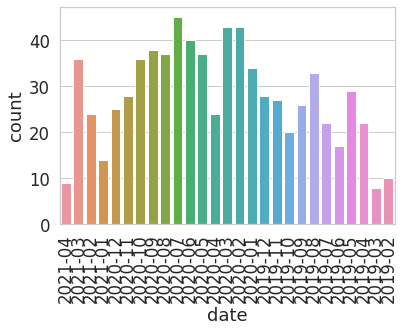

In [ ]:
sns.countplot(data = nps_copy[nps_copy['Category'] == 'bad'], x = 'date');
plt.xticks(rotation=90);

# bad = score of 1-4
# shows count of "bad" ratings during time period
# pretty average again
# 07/20 most "bad" comments
# 04/20 = most notable decrease

In [77]:
def count_of_words(cat,time):
    sub_df = nps_copy[nps_copy.Category == cat]
    sub_df = nps_copy[nps_copy.date == time]
    temp = sub_df["Comment"].str.replace("[^\w\s]", "").str.lower().str.split()
    
    comment_tokens = []
    
    for i in temp:
        try:
            token_list = [s_stemmer.stem(word) for word in i]
        except:
            token_list = []
    
        comment_tokens.append(token_list)
    comment_word_string = " ".join(sum(list(comment_tokens), []))
    a = Counter(comment_word_string.split()).most_common()
    wordcloud = WordCloud(width = 300, height = 300,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_word_string)
    print(a)
  

In [78]:
# word cloud with inputs of category and time
def make_wordcloud_bytime(cat,time):
    sub_df = nps_copy[nps_copy.Category == cat]
    sub_df = nps_copy[nps_copy.date == time]
    temp = sub_df["Comment"].str.replace("[^\w\s]", "").str.lower().str.split()
    
    comment_tokens = []
    
    for i in temp:
        try:
            token_list = [s_stemmer.stem(word) for word in i]
        except:
            token_list = []
    
        comment_tokens.append(token_list)
    comment_word_string = " ".join(sum(list(comment_tokens), []))
    
    wordcloud = WordCloud(width = 300, height = 300,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 15).generate(comment_word_string)
  
    
    # plot the WordCloud image                       
    plt.figure(figsize = (8, 8), facecolor = None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 15)

# Wordclouds By Category and Month

Below are wordclouds based on category and specific month. Specific dates are selected based off of the highest/lowest means in the lineplots above.

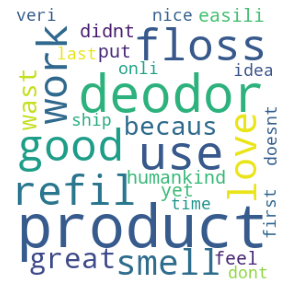

In [85]:
make_wordcloud_bytime('detractor','2021-09')
#02/19 = low mean for "great"

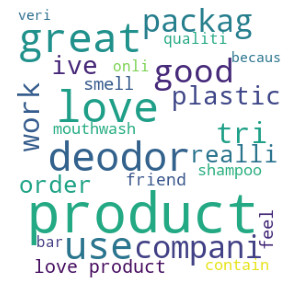

In [ ]:
make_wordcloud_bytime('great','2020-04')
#04/20 = low mean for "great"

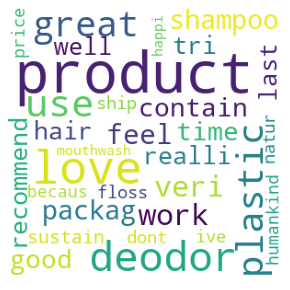

In [ ]:
make_wordcloud_bytime('great','2021-01')
#01/21 = high mean for "great"

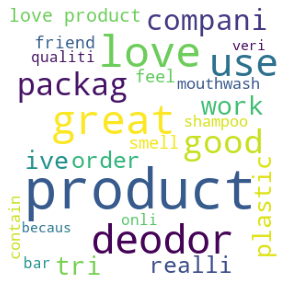

In [ ]:
make_wordcloud_bytime('great','2020-04')
#04/20 = most "great" comments

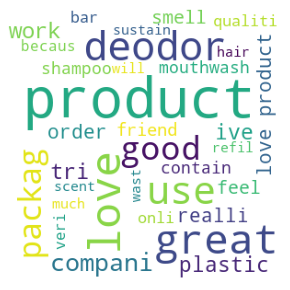

In [ ]:
#11/19 = least "great" comments excluding beginning and end
make_wordcloud_bytime('great','2020-04')

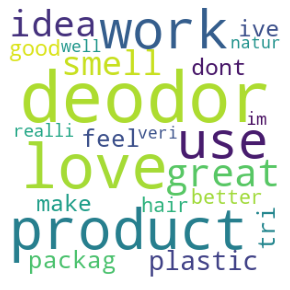

In [ ]:
#05/19 = highest mean for "good"
make_wordcloud_bytime('good','2019-05')

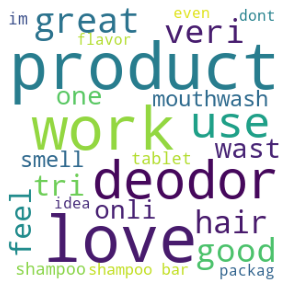

In [ ]:
#07/19 = lowest mean for "good"
make_wordcloud_bytime('good','2019-07')

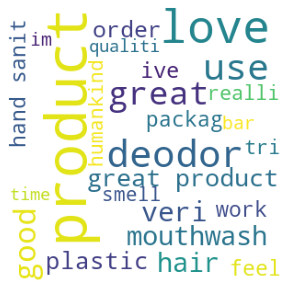

In [ ]:
#05/20 = most "good" comments
make_wordcloud_bytime('good','2020-05')

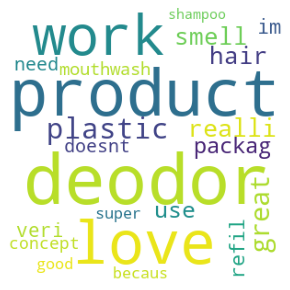

In [ ]:
#09/19 = least "good" comments
make_wordcloud_bytime('good','2019-09')

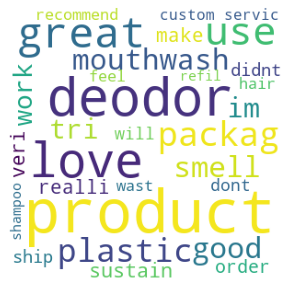

In [ ]:
#08/20 = most "ok" comments
make_wordcloud_bytime('ok','2020-08')

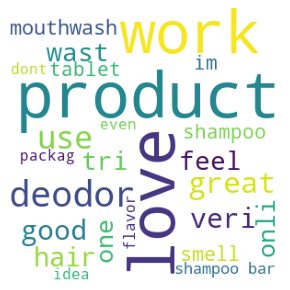

In [ ]:
#07/19 = least "ok" comments
make_wordcloud_bytime('ok','2019-07')

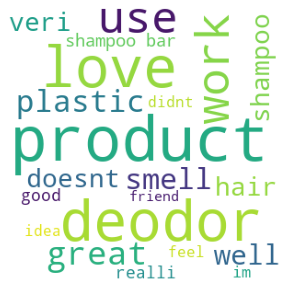

In [ ]:
#08/19, 08/21, 02/21 = highest mean for “bad”
make_wordcloud_bytime('ok','2019-08')

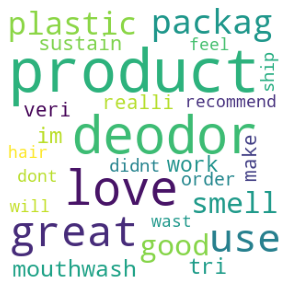

In [ ]:
#08/19, 08/20, 02/21 = highest mean for “bad”
make_wordcloud_bytime('ok','2020-08')

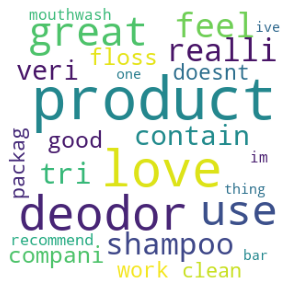

In [ ]:
#08/19, 08/21, 02/21 = highest mean for “bad”
make_wordcloud_bytime('ok','2021-02')

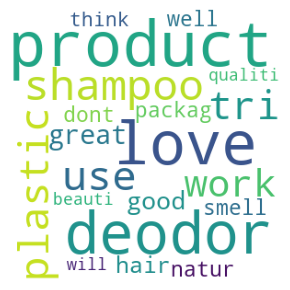

In [ ]:
#03/19, 11/19, 04/20 = lowest mean for “bad”
make_wordcloud_bytime('ok','2019-03')

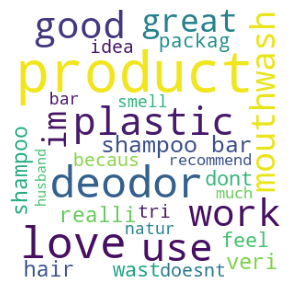

In [ ]:
#03/19, 11/19, 04/20 = lowest mean for “bad”
make_wordcloud_bytime('ok','2019-11')

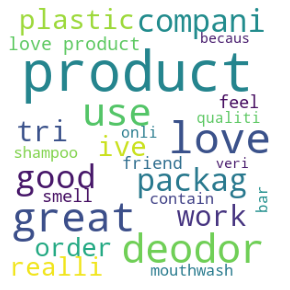

In [ ]:
#03/19, 11/19, 04/20 = lowest mean for “bad”
make_wordcloud_bytime('ok','2020-04')

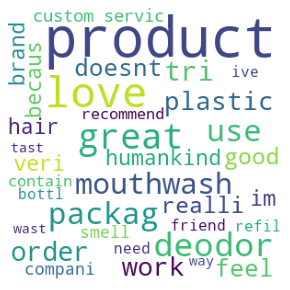

In [ ]:
#07/20 most "bad" comments
make_wordcloud_bytime('great','2020-07')

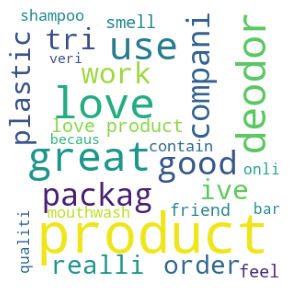

In [ ]:
#04/20 = most notable decrease of “bad” comments
make_wordcloud_bytime('great','2020-04')